This notebook contains a collection of goodness-of-fit tests

In [1]:
import sys
sys.path.append('..')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
from tqdm import tqdm
from sklearn.metrics import *
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(style="darkgrid")
tqdm.pandas()


%matplotlib inline

In [ ]:
# Run all models
from src.models import *

# Goodness-of-Fit Analyses

In general, GoF tests have the following form: $fit - penalty$ (where lower values mean imply better predictive models)

Where the $fit$ typically measures how uncertain the prediction is to variation in parameters: $log(\frac{1}{N}\sum_{i=1}^NP(y|\hat{\theta_i}))$. If for all $\theta_i$, the probability of predicting y is always 1 (certain), then $log(1) = 0$

Where the $penalty$ typically measures the variance of the fitted posterior: $Var_{i=1}^nlog(P(y|\hat{\theta_i}))$

Models summary:
1. _Water model_: __distance to water bodies, annual maxima precipitation__
2. _Soil model_: distance to water bodies, annual maxima precipitation, __soil hydraulic conductivity__
3. _Socio model_: distance to water bodies, annual maxima precipitation, soil hydraulic conductivity, __median housing value__
4. _Topo model_: distance to water bodies, annual maxima precipitation, soil hydraulic conductivity, median housing value, __flow accumulation, elevation__

## 1. Widely Applicable Information Criterion (WAIC)
$fit = \sum_{i=1}^s-2log(\frac{1}{n}\sum_{j=1}^nP(y_i|\hat{\theta_j}))$ (for all points $s$)

$penalty = \sum_{i=1}^sVar_{j=1}^nlog(P(y_i|\hat{\theta_j}))$ (for all points $s$)

Text(0, 0.5, 'WAIC')

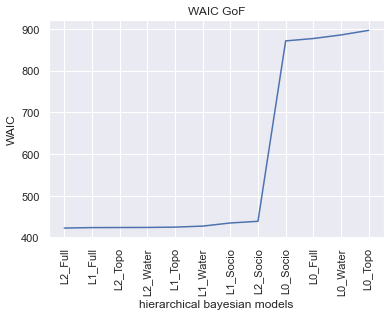

In [3]:
waic_df = pm.compare(traces_dict, ic='WAIC', scale='deviance')
waic_df.reset_index(inplace=True)

# Plot WAIC (lower is better)
ax = waic_df['waic'].plot.line()
ax.set_xticks(range(len(waic_df)))
ax.set_xticklabels(waic_df['index'].values, rotation='vertical')
ax.set_title('WAIC GoF')
ax.set_xlabel('hierarchical bayesian models')
ax.set_ylabel('WAIC')

Text(0, 0.5, 'WAIC relative error (%)')

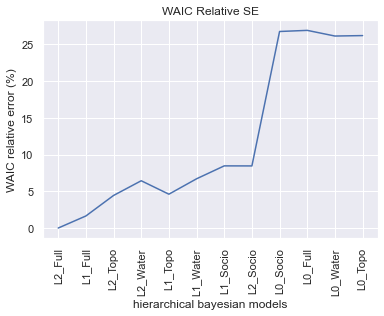

In [4]:
# Plot WAIC relative SE
ax = waic_df['dse'].plot()

ax.set_xticks(range(len(waic_df)))
ax.set_xticklabels(waic_df['index'].values, rotation='vertical')
ax.set_title('WAIC Relative SE')
ax.set_xlabel('hierarchical bayesian models')
ax.set_ylabel('WAIC relative error (%)')

Text(0, 0.5, 'WAIC')

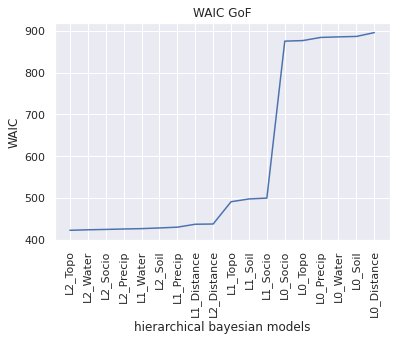

In [ ]:
opt_waic_df = pm.compare(opt_traces_dict, ic='WAIC', scale='deviance')
opt_waic_df.reset_index(inplace=True)

# Plot WAIC (lower is better)
ax = opt_waic_df['waic'].plot.line()
ax.set_xticks(range(len(opt_waic_df)))
ax.set_xticklabels(opt_waic_df['index'].values, rotation='vertical')
ax.set_title('WAIC GoF')
ax.set_xlabel('hierarchical bayesian models')
ax.set_ylabel('WAIC')

Text(0, 0.5, 'WAIC relative error (%)')

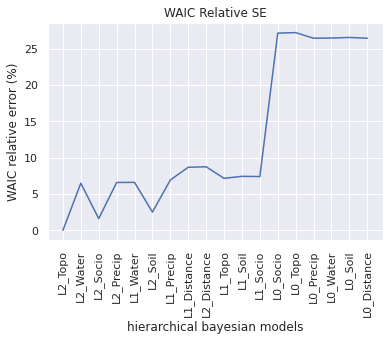

In [ ]:
# Plot WAIC relative SE
ax = opt_waic_df['dse'].plot()

ax.set_xticks(range(len(opt_waic_df)))
ax.set_xticklabels(opt_waic_df['index'].values, rotation='vertical')
ax.set_title('WAIC Relative SE')
ax.set_xlabel('hierarchical bayesian models')
ax.set_ylabel('WAIC relative error (%)')

In [6]:
# Prettier graph: sort in the right order TODO: cleaner function to sort
l2_sorter = ['L2_Water', 'L2_Topo', 'L2_Socio', 'L2_Full']
l2 = waic_df[waic_df['index'].str[:2] == 'L2'].set_index('index')
l2 = l2.loc[l2_sorter]
l2_waic, l2_dse = l2.waic.values, l2.dse.values

l1_sorter = ['L1_Water', 'L1_Topo', 'L1_Socio', 'L1_Full']
l1 = waic_df[waic_df['index'].str[:2] == 'L1'].set_index('index')
l1 = l1.loc[l1_sorter]
l1_waic, l1_dse = l1.waic.values, l1.dse.values

l0_sorter = ['L0_Water', 'L0_Topo', 'L0_Socio', 'L0_Full']
l0 = waic_df[waic_df['index'].str[:2] == 'L0'].set_index('index')
l0 = l0.loc[l0_sorter]
l0_waic, l0_dse = l0.waic.values, l0.dse.values

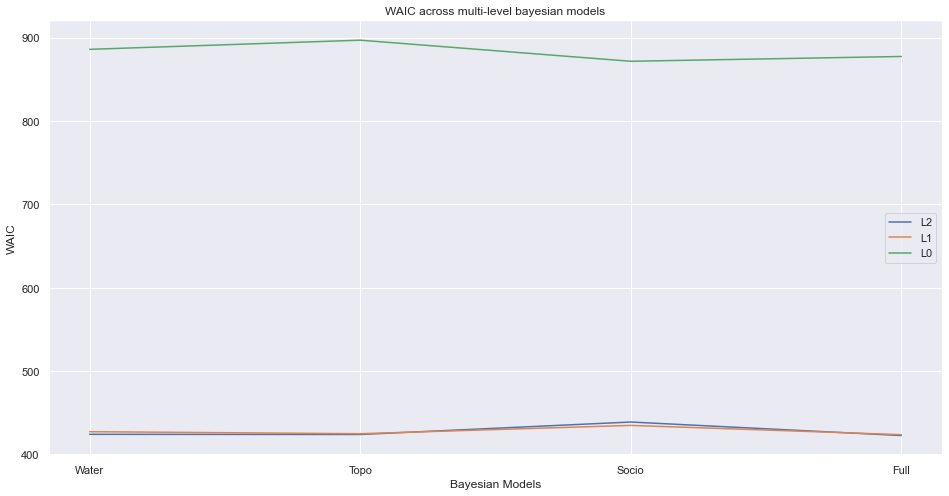

In [8]:
# WAIC
x = ['Water', 'Topo', 'Socio', 'Full']
f, ax = plt.subplots(figsize=(16,8))
ax.plot(x, l2_waic, label='L2')
ax.plot(x, l1_waic, label='L1')
ax.plot(x, l0_waic, label='L0')
ax.set_title('WAIC across multi-level bayesian models')
ax.set_xlabel('Bayesian Models')
ax.set_ylabel('WAIC')
ax.legend()

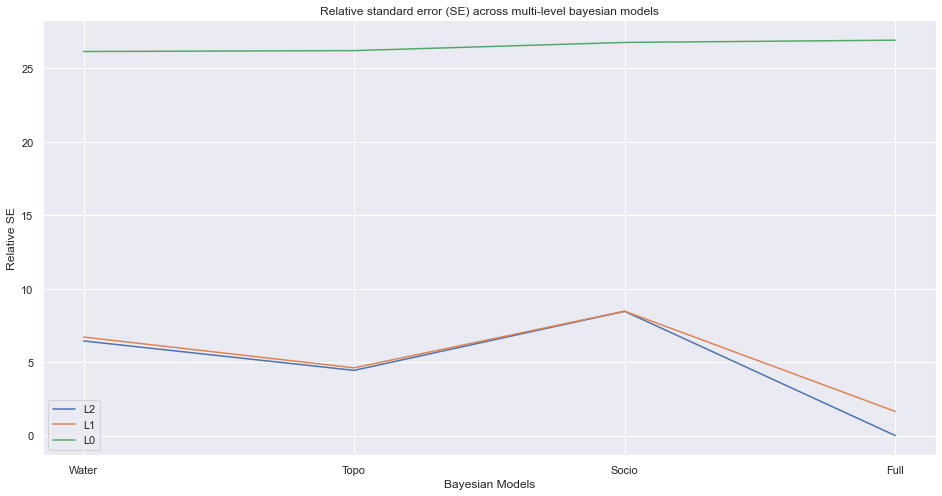

In [9]:
# Uncertainty (dSE)
x = ['Water', 'Topo', 'Socio', 'Full']
f, ax = plt.subplots(figsize=(16,8))
ax.plot(x, l2_dse, label='L2')
ax.plot(x, l1_dse, label='L1')
ax.plot(x, l0_dse, label='L0')
ax.set_title('Relative standard error (SE) across multi-level bayesian models')
ax.set_xlabel('Bayesian Models')
ax.set_ylabel('Relative SE')
ax.legend()

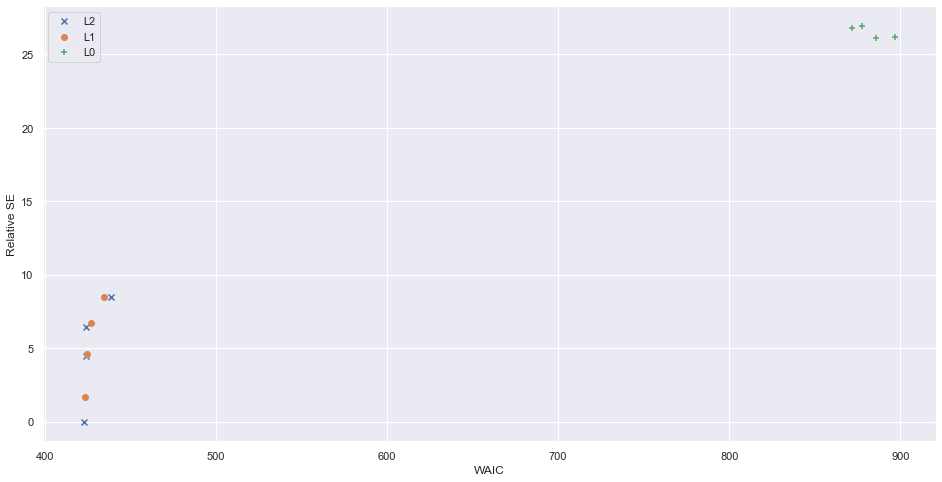

In [49]:
# SE vs WAIC
f, ax = plt.subplots(figsize=(16,8))
ax.scatter(l2_waic, l2_dse, label='L2', marker='x')
ax.scatter(l1_waic, l1_dse, label='L1', marker='o')
ax.scatter(l0_waic, l0_dse, label='L0', marker='+')
# ax.set_title('Relative SE vs WAIC across multi-level bayesian models')
ax.set_xlabel('WAIC')
ax.set_ylabel('Relative SE')
ax.legend()
f.savefig('../docs/waic_se_all.pdf', dpi=300)

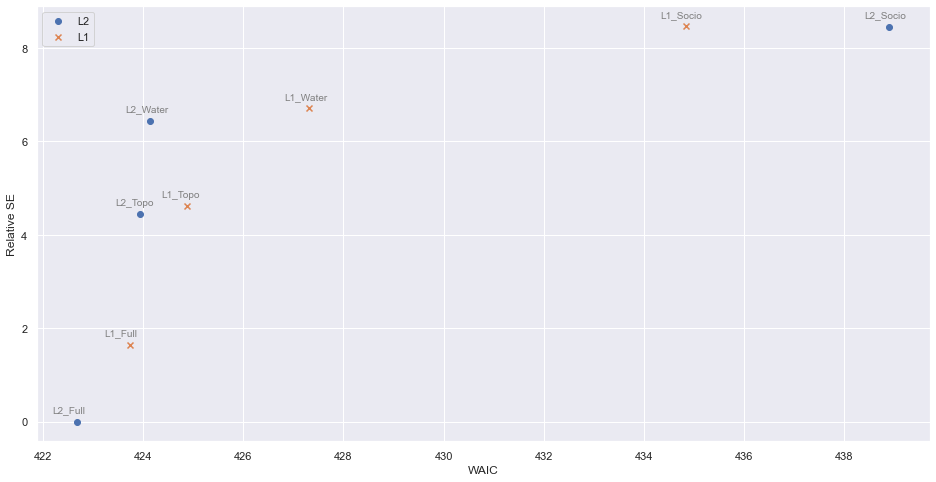

In [48]:
# SE vs WAIC (without l0)
f, ax = plt.subplots(figsize=(16,8))
ax.scatter(l2_waic, l2_dse, label='L2', marker='o')
for i, txt in enumerate(l2.index.values):
    ax.annotate(txt, (l2_waic[i] - 0.5, l2_dse[i] + 0.2), fontsize=10, color='gray')

for i, txt in enumerate(l1.index.values):
    ax.annotate(txt, (l1_waic[i] - 0.5, l1_dse[i] + 0.2), fontsize=10, color='gray')
    
ax.scatter(l1_waic, l1_dse, label='L1', marker='x')
# ax.set_title('Relative SE vs WAIC across multi-level bayesian models')
ax.set_xlabel('WAIC')
ax.set_ylabel('Relative SE')
ax.legend()
f.savefig('../docs/waic_se_l12.pdf', dpi=300)

## 2. Posterior Variance Checks

In [15]:
with full_model:
    ppc = pm.sample_posterior_predictive(
        full_trace, var_names=['wtr_dist', 'ppt', 'hydr', 'hse', 'dem', 'failures']
    )

In [16]:
# Compute aprior and fitted posterior SD
post_init_var = []
post_fit_var = []
for param, var in var_dict.items():
    post_init_var.append(round(np.sqrt(topo_priors[param].var()), 2))
    post_fit_var.append(round(np.sqrt(ppc[param].var()), 2))

init_var_df = pd.DataFrame({'Params': var_dict.keys(), 'SD': post_init_var, 'Posterior': 'priori'})
fit_sig_df = pd.DataFrame({'Params': var_dict.keys(), 'SD': post_fit_var, 'Posterior': 'fitted'})

sig_df = pd.concat([init_var_df, fit_sig_df])

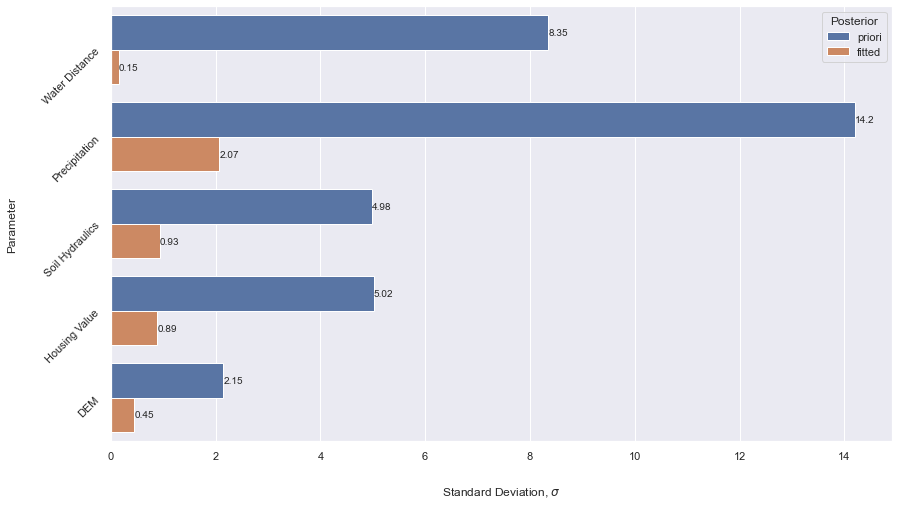

In [47]:
# Plotting
f, ax = plt.subplots(figsize=(14, 8))
ax = sns.barplot(x='SD', y='Params', hue='Posterior', data=sig_df, ci=None, orient='h')
# ax.set_title('SD for Priori and Fitted Posterior', size=16)
ax.set_xlabel('Standard Deviation, $\sigma$', labelpad = 24)
ax.set_ylabel('Parameter', labelpad = 24)
labels = ['Water Distance', 'Precipitation', 'Soil Hydraulics', 'Housing Value', 'DEM']
ax.set_yticklabels(labels)
plt.yticks(rotation = 45)
for i in ax.containers:
    ax.bar_label(i,)
f.savefig('../docs/posterior_var.pdf', dpi=300)